### Importação dos dados



In [76]:
import pandas as pd
from babel.numbers import format_currency
import statistics
import matplotlib.pyplot as plt
import numpy as np


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [77]:
!pip install babel

In [78]:
print(loja["Preço"])

0        219.08
1        256.35
2        279.51
3       1009.99
4        446.99
         ...   
2354    1712.54
2355     377.02
2356     163.82
2357     921.77
2358     259.95
Name: Preço, Length: 2359, dtype: float64


#1. Análise do faturamento


In [79]:
# converte o valor da soma bruta para moeda
def formatar_moeda(valor, moeda='BRL', local='pt_BR'):
  return format_currency(round(valor, 2), moeda, locale=local)


# calculo de faturamento de cada loja
faturamento_loja = formatar_moeda(sum(loja['Preço']))
faturamento_loja2 = formatar_moeda(sum(loja2['Preço']))
faturamento_loja3 = formatar_moeda(sum(loja3['Preço']))
faturamento_loja4 = formatar_moeda(sum(loja4['Preço']))

print(f"Faturamento loja 1: {faturamento_loja}")
print(f"Faturamento loja 2: {faturamento_loja2}")
print(f"Faturamento loja 3: {faturamento_loja3}")
print(f"Faturamento loja 4: {faturamento_loja4}")

Faturamento loja 1: R$ 1.534.509,12
Faturamento loja 2: R$ 1.488.459,06
Faturamento loja 3: R$ 1.464.025,03
Faturamento loja 4: R$ 1.384.497,58


# 2. Vendas por Categoria


In [80]:
# contagem de cada categoria em cada loja
qtd_vendas_categorias_loja = loja['Categoria do Produto'].value_counts()
qtd_vendas_categorias_loja2 = loja2['Categoria do Produto'].value_counts()
qtd_vendas_categorias_loja3 = loja3['Categoria do Produto'].value_counts()
qtd_vendas_categorias_loja4 = loja4['Categoria do Produto'].value_counts()

for c in qtd_vendas_categorias_loja:
  print(c)

465
448
324
312
284
182
173
171


In [81]:
print(f"Qtd. vendas loja 1: \n{qtd_vendas_categorias_loja}")
print(f"Qtd. vendas loja 2: \n{qtd_vendas_categorias_loja2}")
print(f"Qtd. vendas loja 3: \n{qtd_vendas_categorias_loja3}")
print(f"Qtd. vendas loja 4: \n{qtd_vendas_categorias_loja4}")

Qtd. vendas loja 1: 
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64
Qtd. vendas loja 2: 
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64
Qtd. vendas loja 3: 
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64
Qtd. vendas loja 4: 
Categoria do Produto
moveis                   480
eletronicos              451


# 3. Média de Avaliação das Lojas

In [82]:
#calculo da media de avaliação de cada loja
media_avaliacao_loja = round(statistics.mean(loja['Avaliação da compra']), 2)
media_avaliacao_loja2 = round(statistics.mean(loja2['Avaliação da compra']), 2)
media_avaliacao_loja3 = round(statistics.mean(loja3['Avaliação da compra']), 2)
media_avaliacao_loja4 = round(statistics.mean(loja4['Avaliação da compra']), 2)

print(f"[LOJA 1] Média de avaliação: {media_avaliacao_loja}")
print(f"[LOJA 2] Média de avaliação: {media_avaliacao_loja2}")
print(f"[LOJA 3] Média de avaliação: {media_avaliacao_loja3}")
print(f"[LOJA 4] Média de avaliação: {media_avaliacao_loja4}")

[LOJA 1] Média de avaliação: 3.98
[LOJA 2] Média de avaliação: 4.04
[LOJA 3] Média de avaliação: 4.05
[LOJA 4] Média de avaliação: 4.0


# 4. Produtos Mais e Menos Vendidos

In [83]:
qtd_produtos_vendidos_loja = loja['Produto'].value_counts()
qtd_produtos_vendidos_loja2 = loja2['Produto'].value_counts()
qtd_produtos_vendidos_loja3 = loja3['Produto'].value_counts()
qtd_produtos_vendidos_loja4 = loja4['Produto'].value_counts()

print(f"Quantidade de vendas na loja 1: \n{qtd_produtos_vendidos_loja}")
print("-" * 25)
print(f"Quantidade de vendas na loja 2: \n{qtd_produtos_vendidos_loja2}")
print("-" * 25)
print(f"Quantidade de vendas na loja 3: \n{qtd_produtos_vendidos_loja3}")
print("-" * 25)
print(f"Quantidade de vendas na loja 4: \n{qtd_produtos_vendidos_loja4}")


Quantidade de vendas na loja 1: 
Produto
Micro-ondas                    60
TV Led UHD 4K                  60
Guarda roupas                  60
Secadora de roupas             58
Cômoda                         56
Blocos de montar               56
Bola de basquete               55
Bicicleta                      54
Copo térmico                   54
Geladeira                      54
Impressora                     54
Bateria                        53
Faqueiro                       52
Carrinho controle remoto       52
Modelagem preditiva            51
Fone de ouvido                 50
Xadrez de madeira              49
Celular Plus X42               49
Lava louças                    48
Lavadora de roupas             47
Guitarra                       47
Violão                         46
Sofá retrátil                  46
Cadeira de escritório          46
Fogão                          45
Cama box                       44
Kit banquetas                  44
Smart TV                       44
Cama ki

# 5. Frete Médio por Loja


In [84]:
custo_medio_frete_por_loja = loja.groupby('Local da compra')['Frete'].mean().sort_index()
custo_medio_frete_por_loja2 = loja2.groupby('Local da compra')['Frete'].mean().sort_index()
custo_medio_frete_por_loja3 = loja3.groupby('Local da compra')['Frete'].mean().sort_index()
custo_medio_frete_por_loja4 = loja4.groupby('Local da compra')['Frete'].mean().sort_index()

print(custo_medio_frete_por_loja)


#print(f"Custo médio do frete por loja: \n{custo_medio_frete_por_loja}")
#print("-" * 50)
#print(f"Custo médio do frete por loja 2: \n{custo_medio_frete_por_loja2}")
#print("-" * 50)
#print(f"Custo médio do frete por loja 3: \n{custo_medio_frete_por_loja3}")
#print("-" * 50)
#print(f"Custo médio do frete por loja 4: \n{custo_medio_frete_por_loja4}")"""

Local da compra
AC    123.838510
AL     38.839121
AM     25.022479
AP     16.491483
BA     31.610737
CE     30.121490
DF     30.168740
ES     25.961912
GO     53.505762
MA     22.300109
MG     33.491949
MS     34.915567
MT     37.277719
PA     30.479042
PB     48.145133
PE     40.777908
PI     42.014853
PR     38.807949
RJ     41.274447
RN     44.657514
RO     57.888058
RS     38.129558
SC     31.441707
SE     23.076795
SP     31.754142
TO     46.276229
Name: Frete, dtype: float64


# **Gráficos**

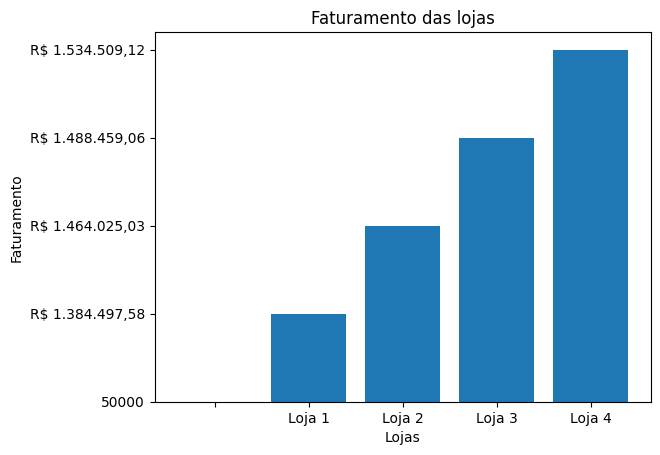

In [85]:
#gráfico de colunas
valores_x = ["", "Loja 1", "Loja 2", "Loja 3", "Loja 4"]
valores_y = ["50000", faturamento_loja4, faturamento_loja3, faturamento_loja2, faturamento_loja]

plt.bar(valores_x, valores_y)
plt.title("Faturamento das lojas")
plt.xlabel("Lojas")
plt.ylabel("Faturamento")
plt.show()

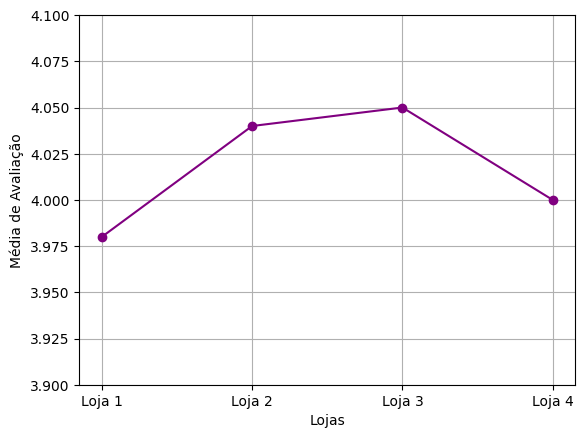

In [86]:
#gráfico de linha com marcadores
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
avaliacoes = [media_avaliacao_loja, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

plt.plot(lojas, avaliacoes, marker="o", linestyle="-", color="purple")
plt.xlabel("Lojas")
plt.ylabel("Média de Avaliação")
plt.ylim(3.9, 4.1)  # foco na faixa relevante
plt.grid(True)




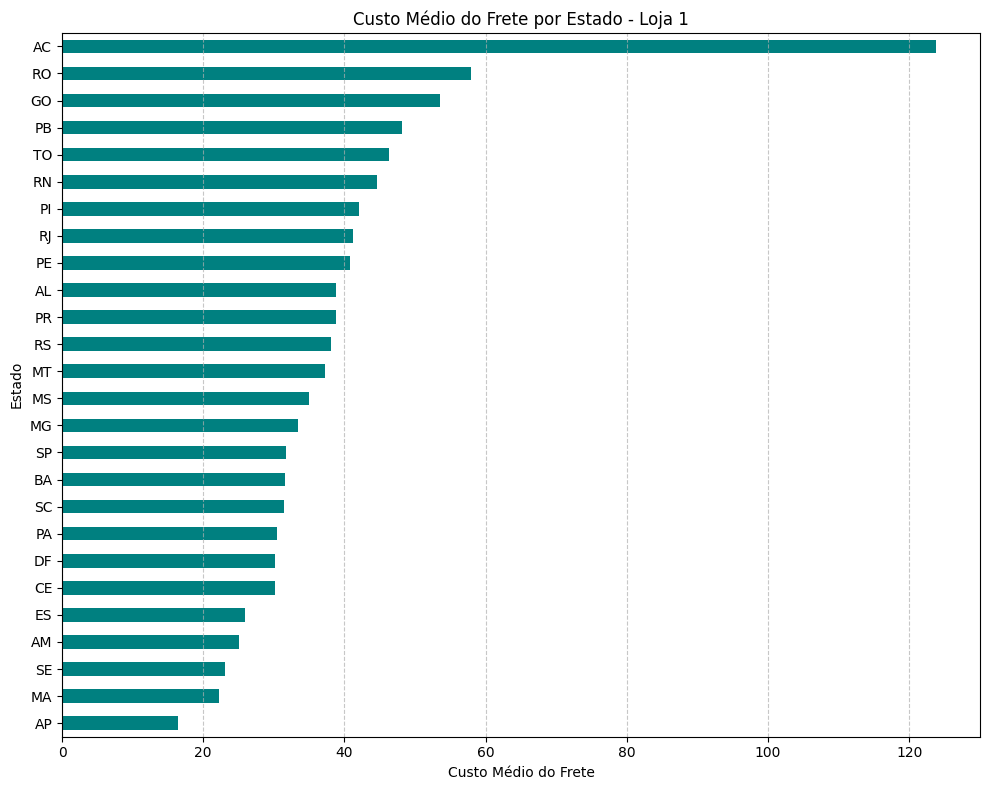

In [87]:
custo_medio_frete_por_loja.sort_values().plot(kind='barh', figsize=(10,8), color='teal')
plt.title('Custo Médio do Frete por Estado - Loja 1')
plt.xlabel('Custo Médio do Frete')
plt.ylabel('Estado')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

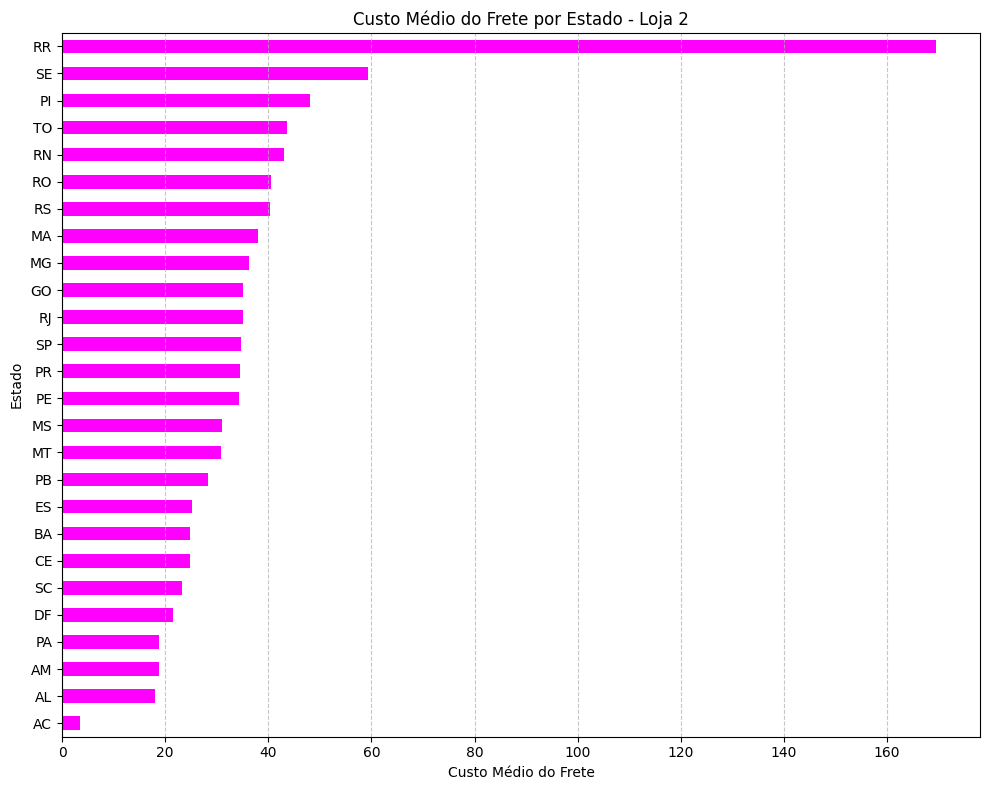

In [88]:
custo_medio_frete_por_loja2.sort_values().plot(kind='barh', figsize=(10,8), color='magenta')
plt.title('Custo Médio do Frete por Estado - Loja 2')
plt.xlabel('Custo Médio do Frete')
plt.ylabel('Estado')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

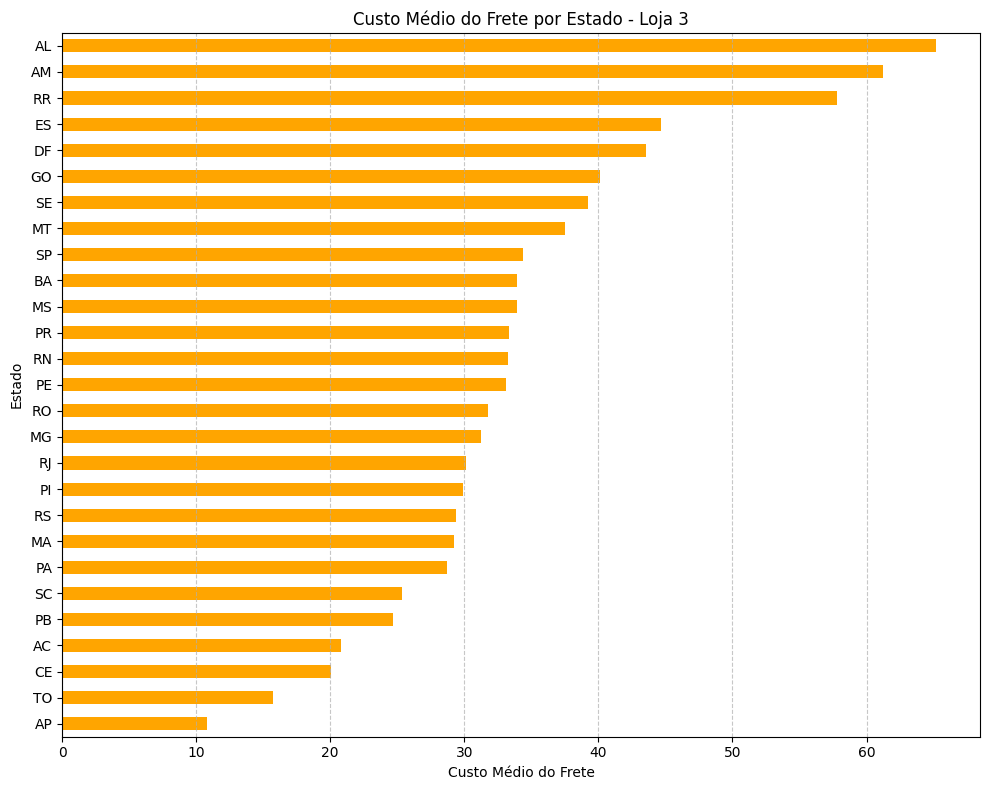

In [89]:
custo_medio_frete_por_loja3.sort_values().plot(kind='barh', figsize=(10,8), color='orange')
plt.title('Custo Médio do Frete por Estado - Loja 3')
plt.xlabel('Custo Médio do Frete')
plt.ylabel('Estado')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

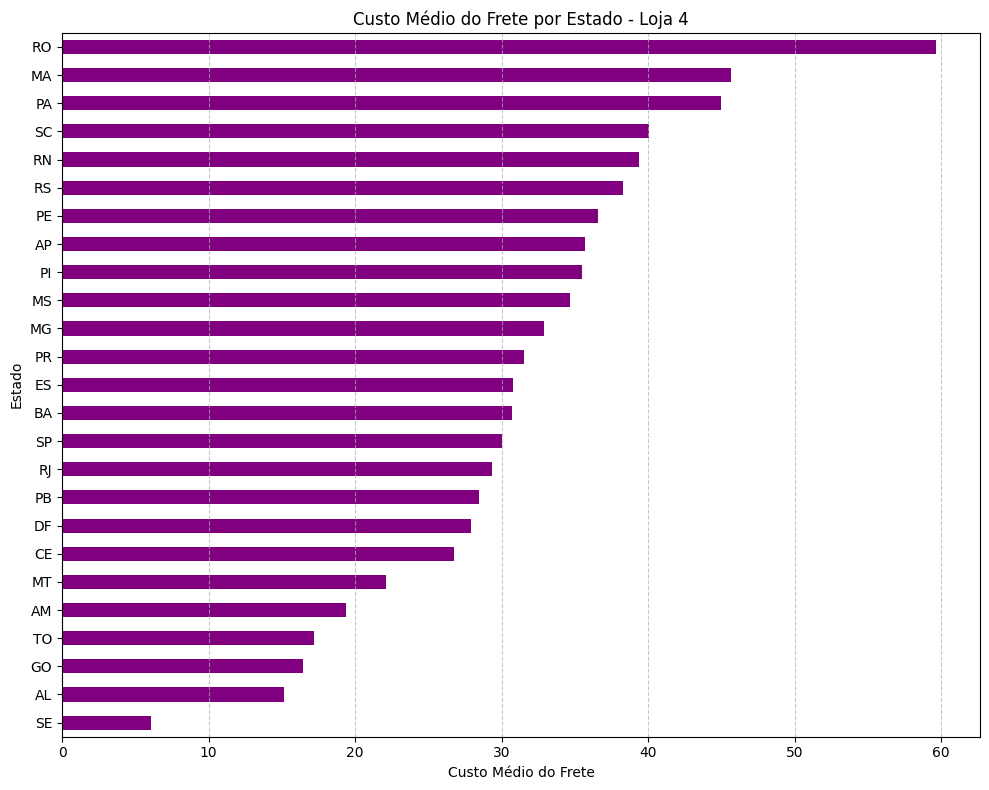

In [90]:
custo_medio_frete_por_loja4.sort_values().plot(kind='barh', figsize=(10,8), color='purple')
plt.title('Custo Médio do Frete por Estado - Loja 4')
plt.xlabel('Custo Médio do Frete')
plt.ylabel('Estado')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# **RELATÓRIO**

Com base nas analises obtidas no processo e analise de dados das quatros lojas, foi percebido que a melhor opção de loja a ser vendida foi a **loja 1**.
Essa decisão foi tomada com base nos valores obtidos no momento de calcular as médias no código e também na analise visual dos gráficos gerados em cima desses valores calculados.

A seguir, segue a analise final que justifica a decisão tomada:
## Faturamento de cada loja **negrito**
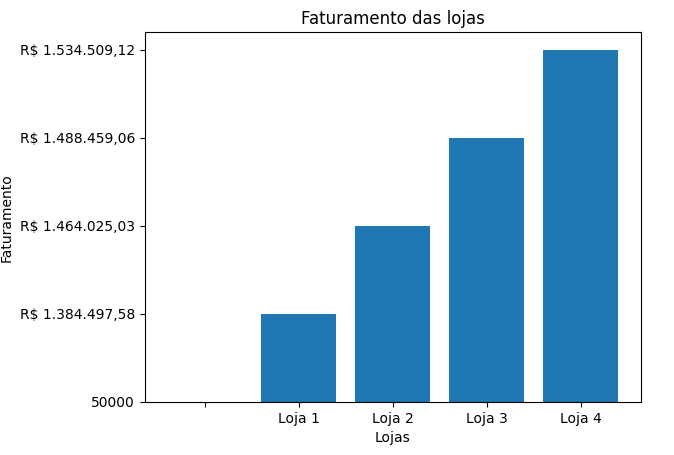

Pode-se perceber, que a loja que obteve o menor faturamento, logo, gerando a menor receita foi a loja 1 dentre as outras 3.

Para a segunda analise foi avaliado a média de avaliação de cada loja, como já se esperado, a loja 1 tendo a pior média de avaliação:

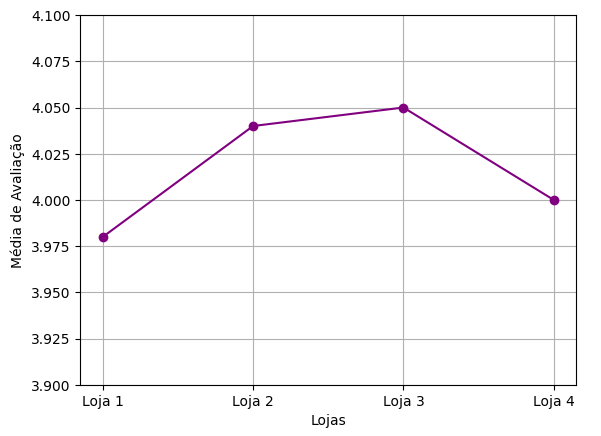

Por fim, foram criados para para loja um gráfico que representasse todos os custos médios de frete, assim, complementando a visão de que a loja 1 teria que ser vendida por conter os maiores custos por região:
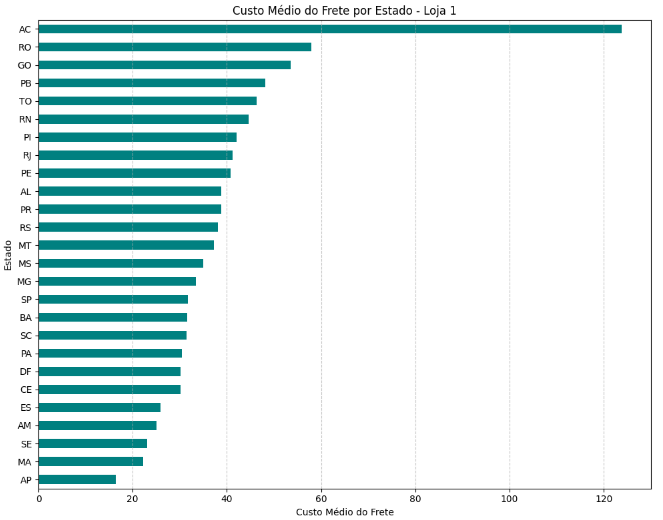


Sendo assim, conclui-se que com base nos dados e analises obtidas, é evidente que a melhor opção de venda seja a loja 1.